Compresing color by K-means

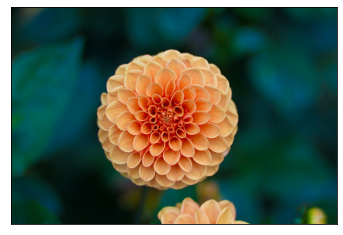

In [3]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#loading image
china=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)


In [2]:
#return the dimensions of rhe array
china.shape

(427, 640, 3)

In [6]:
#reshape the dara to [n_samples x n_:features], and rescale the colors so that they lie
#between 0 and 1
data=china / 255.0 #use 0...1 scale
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [24]:

def plot_pixels(data, title, colors=None,N=10000):
    
    if colors is None:
        colors=data

    #choose a random subset
    rng= np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T

    fig, ax= plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))

    fig.suptitle(title, size=20)



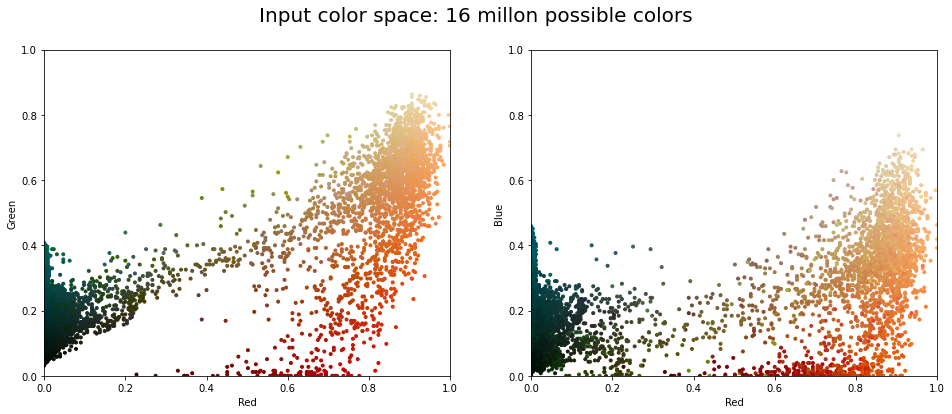

In [25]:
plot_pixels(data, title='Input color space: 16 millon possible colors')

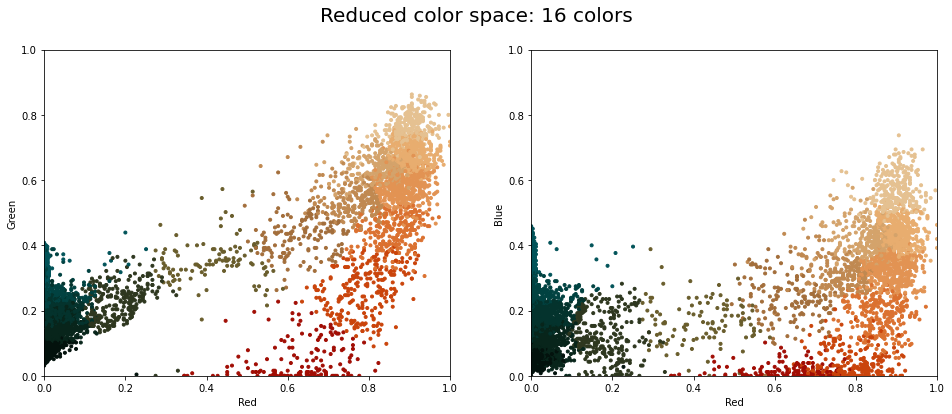

In [26]:
import warnings; warnings.simplefilter('ignore') #Fix Numpy issues

#aplay model
from sklearn.cluster import MiniBatchKMeans
kmeans= MiniBatchKMeans(16)
kmeans.fit(data)
new_colors= kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, title='Reduced color space: 16 colors',
            colors=new_colors)


Text(0.5, 1.0, '16-color Image')

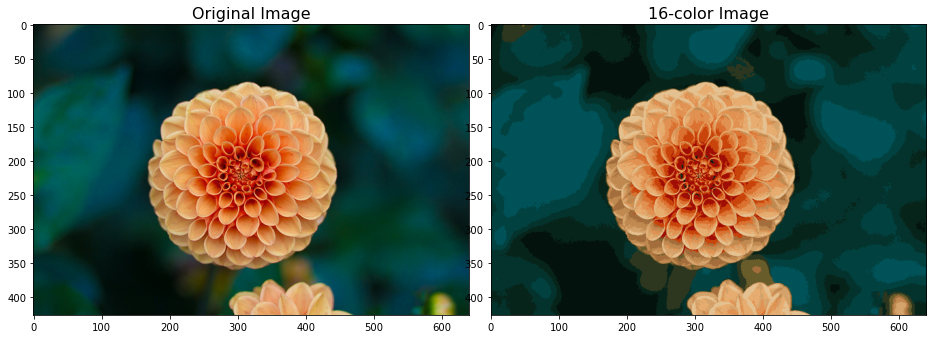

In [31]:
#compresing
china_recoled= new_colors.reshape(china.shape)

#plot original and new image
fig, ax= plt.subplots(1,2, figsize=(16,6))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recoled)
ax[1].set_title('16-color Image', size=16)
